# Comparative Analysis of Airbnb Calendar Data for Boston and Seattle

## Business Understanding

This section will outline the objectives of the analysis, the needs of the business, and the goals we aim to achieve with this project.

### Objectives:
- To compare Airbnb pricing strategies between Boston and Seattle.
- To identify availability trends across different months.
- To provide actionable insights for hosts to optimize their listing prices and for guests to plan their bookings.

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Data Understanding

### Data Collection

The datasets for both Boston and Seattle include listings, reviews, and calendar data, which contain information about availability and pricing. We will load these datasets and conduct a preliminary exploration to assess the data quality and structure.

### Exploratory Data Analysis

Initial exploration of the datasets will be performed to understand the distributions of key variables, identify missing values, and observe any patterns or anomalies that need to be addressed.


In [150]:
def load_csv(file_path):
    """
    Load a CSV file into a Pandas DataFrame.

    Parameters:
    - file_path (str): The complete file path to the CSV file.

    Returns:
    - DataFrame: The loaded data as a Pandas DataFrame.
    """
    return pd.read_csv(file_path)

In [151]:
base_dir = "Boston_Seatle_Airbnb_Calendar_Data_Analysis/Datasets"

boston_listings = load_csv(f"{base_dir}/boston_airbnb/listings.csv")
boston_calendar = load_csv(f"{base_dir}/boston_airbnb/calendar.csv")
boston_reviews = load_csv(f"{base_dir}/boston_airbnb/reviews.csv")

seattle_listings = load_csv(f"{base_dir}/seatle_airbnb/listings.csv")
seattle_calendar = load_csv(f"{base_dir}/seatle_airbnb/calendar.csv")
seattle_reviews = load_csv(f"{base_dir}/seatle_airbnb/reviews.csv")

In [152]:
boston_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [153]:
boston_calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [154]:
boston_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [3]:
#Size of dataset
boston_listings.shape

(3585, 95)

In [4]:
#check columns that has all missing values      
(boston_listings.isnull().sum() == boston_listings.shape[0]).sum()

4

In [5]:
#Fully empty column names
boston_listings.columns[boston_listings.isnull().all()]

Index(['neighbourhood_group_cleansed', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

## Focus on Calendar Data for Business Questions

In this study, we will be concentrating on the calendar data to address the business questions outlined at the beginning of the notebook. The calendar dataset allows for a quick yet insightful analysis, providing immediate value and understanding of pricing and availability trends.

While the other datasets, including listings and reviews, also contain valuable information that could lead to deeper insights, they require a more extensive analysis. Therefore, they will be considered for a separate, dedicated study to ensure each dataset is given the appropriate attention to detail it deserves.


## Analyzing the Relationship Between Availability and Price Data in Airbnb Calendars

This analysis aims to understand how the availability of listings correlates with the presence or absence of price information. Specifically, we are interested in determining if missing price data is associated with listings being unavailable.

In [141]:
def analyze_price_availability_relation(calendar_data, city_name):
    """
    Analyze the relation between listing availability and missing prices in the Airbnb calendar data.

    Parameters:
    - calendar_data (DataFrame): The Airbnb calendar data.
    - city_name (str): The name of the city for reporting purposes.
    
    Returns:
    - dict: A dictionary with counts of each condition.
    """
    # Counts of each condition
    missing_price_not_available = calendar_data[(calendar_data['price'].isnull()) & (calendar_data['available'] == 'f')].shape[0]
    missing_price_available = calendar_data[(calendar_data['price'].isnull()) & (calendar_data['available'] == 't')].shape[0]
    price_present_not_available = calendar_data[(calendar_data['price'].notnull()) & (calendar_data['available'] == 'f')].shape[0]
    price_present_available = calendar_data[(calendar_data['price'].notnull()) & (calendar_data['available'] == 't')].shape[0]
    
    # Print the results
    print(f"{city_name} Airbnb Calendar Data Analysis:")
    print(f"Missing price and not available = {missing_price_not_available}")
    print(f"Missing price and available = {missing_price_available}")
    print(f"Price present and not available = {price_present_not_available}")
    print(f"Price present and available = {price_present_available}")
    
    return {
        'missing_price_not_available': missing_price_not_available,
        'missing_price_available': missing_price_available,
        'price_present_not_available': price_present_not_available,
        'price_present_available': price_present_available
    }

### Boston Airbnb Calendar Data

We will first examine the Boston Airbnb calendar dataset to assess the pattern between listing availability and missing prices.

In [155]:
boston_counts = analyze_price_availability_relation(boston_calendar, 'Boston')

Boston Airbnb Calendar Data Analysis:
Missing price and not available = 665853
Missing price and available = 0
Price present and not available = 0
Price present and available = 643037


### Seattle Airbnb Calendar Data

After analyzing the Boston data, we will perform a similar examination on the Seattle Airbnb calendar dataset to verify if the observed pattern holds.

In [156]:
seattle_counts = analyze_price_availability_relation(seattle_calendar, 'Seattle')

Seattle Airbnb Calendar Data Analysis:
Missing price and not available = 459028
Missing price and available = 0
Price present and not available = 0
Price present and available = 934542


By looking at the outputs above, we can  say that *price value is missing only when listing is not available* in both datasets.

## Prepare Data

In this phase, we will preprocess the data to prepare it for analysis. This involves cleaning the data, handling missing values, and transforming variables as necessary.

### Data Cleaning:
- Addressing missing or null values.
- Normalizing data formats, particularly for price and date columns.
- Ensuring consistency across datasets.

### Data Transformation:
- Aggregating data to a monthly level for analysis.
- Creating new variables if necessary to aid in the analysis.

In [157]:
#check data types
boston_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [158]:
def preprocess_calendar_data(calendar_df):
    """
    Preprocess the calendar data by converting data types.

    Parameters:
    - calendar_df (DataFrame): The calendar DataFrame with 'date', 'price', and 'available' columns.

    Returns:
    - DataFrame: The processed calendar DataFrame with correct data types.
    """
    # Convert 'date' to datetime
    calendar_df['date'] = pd.to_datetime(calendar_df['date'])
    
    # Remove dollar signs from 'price' and convert to float
    calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Map 'available' column to 1s and 0s
    calendar_df['available'] = calendar_df['available'].map({'t': 1, 'f': 0})
    
    return calendar_df

In [159]:
#Converting data types
boston_calendar = preprocess_calendar_data(boston_calendar)
seattle_calendar = preprocess_calendar_data(seattle_calendar)

In [160]:
#Check data types
boston_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available              int64
price                float64
dtype: object

In [161]:
#Handling missing price values by replacing NaNs with 0
boston_calendar.fillna(0, inplace=True)
seattle_calendar.fillna(0, inplace=True)

In [162]:
def analyze_airbnb_calendar(calendar_data, city_name):
    """
    Analyze the Airbnb calendar data for a given city to compute basic summary statistics, 
    availability analysis, and temporal trends.

    Parameters:
    - calendar_data (DataFrame): The Airbnb calendar data for the city.
    - city_name (str): The name of the city.

    Returns:
    - dict: A dictionary containing the computed statistics and analysis results.
    """
    # Basic Summary Statistics
    mean_price = calendar_data['price'].mean()
    median_price = calendar_data['price'].median()
    min_price = calendar_data['price'].min()
    max_price = calendar_data['price'].max()
    std_dev_price = calendar_data['price'].std()
    
    # Availability Analysis
    availability_counts = calendar_data['available'].value_counts()
    availability_proportion = calendar_data['available'].value_counts(normalize=True)
    
    # Temporal Trends
    calendar_data['month'] = pd.to_datetime(calendar_data['date']).dt.month
    average_monthly_price = calendar_data.groupby('month')['price'].mean()
    
    # Compile the results
    results = {
        'mean_price': mean_price,
        'median_price': median_price,
        'min_price': min_price,
        'max_price': max_price,
        'std_dev_price': std_dev_price,
        'availability_counts': availability_counts.to_dict(),
        'availability_proportion': availability_proportion.to_dict(),
        'average_monthly_price': average_monthly_price.to_dict(),
    }
    
    # Print the results
    print(f"{city_name} Airbnb Calendar Data Analysis:")
    for key, value in results.items():
        print(f"{key}: {value}")
    
    return results


In [163]:
# Analyze Boston Airbnb Calendar Data
boston_results = analyze_airbnb_calendar(boston_calendar, 'Boston')

Boston Airbnb Calendar Data Analysis:
mean_price: 97.48990442283156
median_price: 0.0
min_price: 0.0
max_price: 7163.0
std_dev_price: 160.57521078945035
availability_counts: {0: 665853, 1: 643037}
availability_proportion: {0: 0.5087157820748879, 1: 0.4912842179251121}
average_monthly_price: {1: 103.89387042800857, 2: 102.38622420524261, 3: 90.2518755734667, 4: 94.21126603457891, 5: 93.40067106849216, 6: 96.3329894032348, 7: 100.11383876365076, 8: 101.62483133332134, 9: 73.59100204498978, 10: 97.3110123598942, 11: 111.07838817624094, 12: 105.6810445639854}


In [164]:
# Analyze Seattle Airbnb Calendar Data
seattle_results = analyze_airbnb_calendar(seattle_calendar, 'Seattle')

Seattle Airbnb Calendar Data Analysis:
mean_price: 92.50720380031143
median_price: 75.0
min_price: 0.0
max_price: 1650.0
std_dev_price: 107.72948871559427
availability_counts: {1: 934542, 0: 459028}
availability_proportion: {1: 0.6706100160020666, 0: 0.32938998399793334}
average_monthly_price: {1: 69.6834992142483, 2: 82.30843915391702, 3: 91.2330471957958, 4: 89.68370001746115, 5: 94.2818229439497, 6: 99.45359699668238, 7: 95.37785363051083, 8: 97.18125517497761, 9: 96.61209184564345, 10: 95.44465942310617, 11: 96.87991094814039, 12: 100.95880295375049}


## Price Distribution Analysis

The following plots illustrate the distribution of Airbnb listing prices in Boston and Seattle. Outliers are filtered out for better visualization, and Kernel Density Estimation (KDE) is used to show the probability density of the prices.


In [165]:
def plot_price_distribution(calendar_data, city, color):
    """
    Plot the price distribution for an Airbnb calendar dataset after filtering out extreme outliers.

    Parameters:
    - calendar_data (DataFrame): The Airbnb calendar data.
    - city (str): The name of the city for title purposes.
    - color (str): The color to use for the histogram.
    """
    # Set the style of seaborn
    sns.set_style('whitegrid')

    # Filter out the extreme outliers for better visualization
    price_filter = calendar_data[calendar_data['price'] > 0]['price']
    q_low = price_filter.quantile(0.01)
    q_high = price_filter.quantile(0.99)
    filtered_prices = price_filter[(price_filter >= q_low) & (price_filter <= q_high)]

    # Create the plot with increased figure size for better visibility
    plt.figure(figsize=(10, 6))

    # Plot the histogram with a smaller bin size and include a KDE
    sns.histplot(filtered_prices, bins=50, color=color, kde=True)

    # Enhancing the plot with titles and labels
    plt.title(f"Distribution of Prices in {city}", fontsize=16)
    plt.xlabel('Price (USD)', fontsize=14, labelpad=15)
    plt.ylabel('Frequency', fontsize=14, labelpad=15)
    plt.xlim(0, filtered_prices.max())  # Limit x-axis to the max of the filtered range

    # Customize tick parameters for both axes
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Set the formatter for the y-axis to be a simple scalar (without scientific notation)
    plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

    # Display the plot
    plt.tight_layout()
    plt.show()


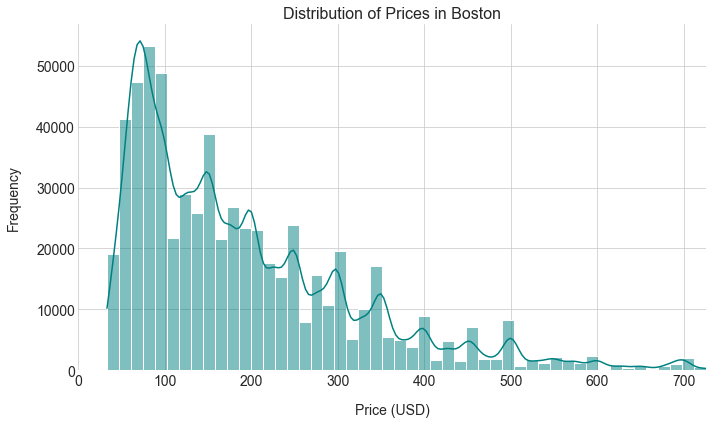

In [166]:
# Plot the price distribution for Boston
plot_price_distribution(boston_calendar, 'Boston', 'teal')

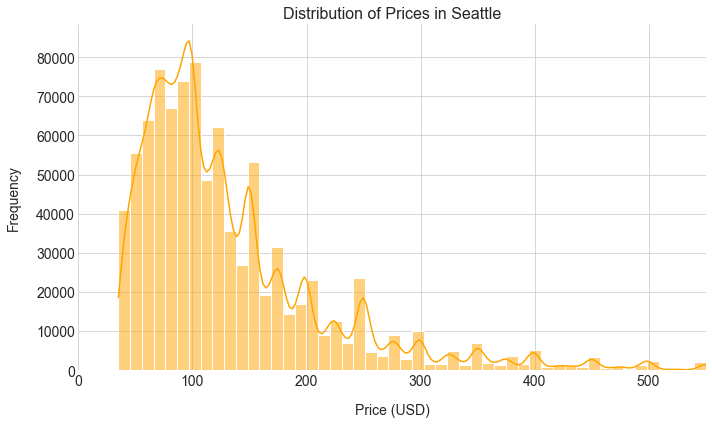

In [167]:
# Plot the price distribution for Seattle
plot_price_distribution(seattle_calendar, 'Seattle', 'orange')

## Availability Over Time

This section analyzes the average monthly availability of Airbnb listings in both Boston and Seattle. The bar charts provide a clear visual representation of how availability fluctuates throughout the year.

In [168]:
def plot_availability(data_dict, colors, hold=False):
    """
    Plot the average monthly availability for Airbnb listings. Can plot multiple cities' data
    together or separately.

    Parameters:
    - data_dict (dict): Dictionary with city names as keys and corresponding DataFrame as values.
    - colors (dict): Dictionary with city names as keys and corresponding color for the plot as values.
    - hold (bool): If True, plot all cities on the same axes; otherwise, plot separately.
    """
    # Set the style for better visibility
    sns.set_style('whitegrid')

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Determine the number of datasets to plot
    num_datasets = len(data_dict)
    width = 0.4  # the width of the bars

    # Define the x-axis positions for the bars
    x_positions = np.arange(12)  # There are 12 months in a year

    # Plot each city's data
    for i, (city, calendar_data) in enumerate(data_dict.items()):
        # Ensure month is of datetime type and extract the month
        calendar_data['month'] = pd.to_datetime(calendar_data['date']).dt.month
        availability_by_month = calendar_data.groupby('month')['available'].mean()

        # Plot settings
        if hold:
            # For combined plots, offset the x positions for each city
            x = x_positions - width/2 + i * width
        else:
            # For individual plots, use the center x positions
            x = x_positions

        # Plot the bars for the city
        ax.bar(x, availability_by_month, width, label=city, color=colors[city])

    # Set the title, labels, and x-tick labels
    ax.set_title('Average Monthly Airbnb Availability', fontsize=18, pad=20)
    ax.set_xlabel('Month', fontsize=16, labelpad=15)
    ax.set_ylabel('Average Availability (%)', fontsize=16, labelpad=15)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=15)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.tick_params(axis='y', labelsize=16)
    ax.legend(fontsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
        
    # Enable grid and set it below the bars
    # ax.grid(True)
    # ax.set_axisbelow(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


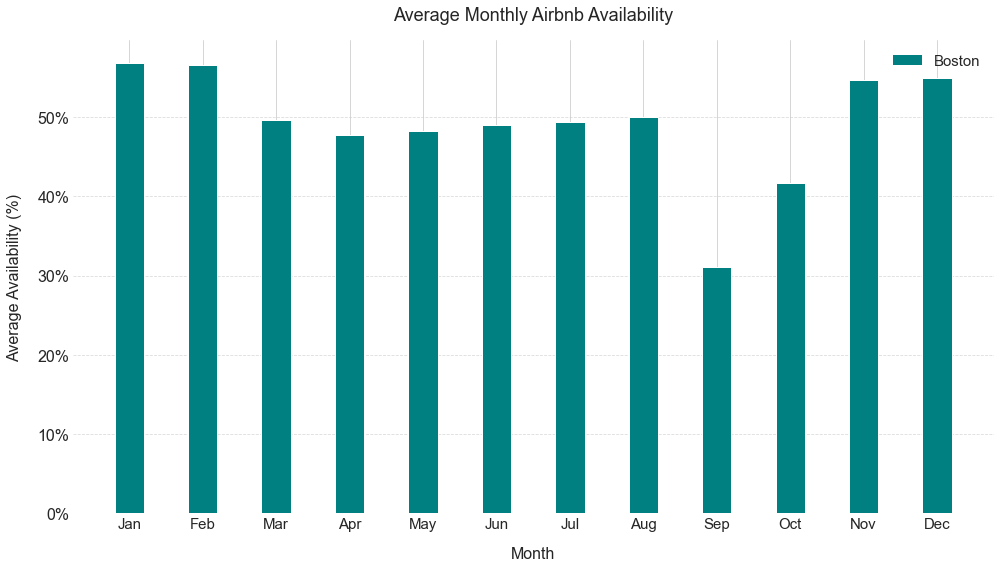

In [169]:
#Boston Airbnb Calendar Data
# Availability Over Time
data_dict = {'Boston': boston_calendar}
colors = {'Boston': 'teal'}
plot_availability(data_dict, colors)

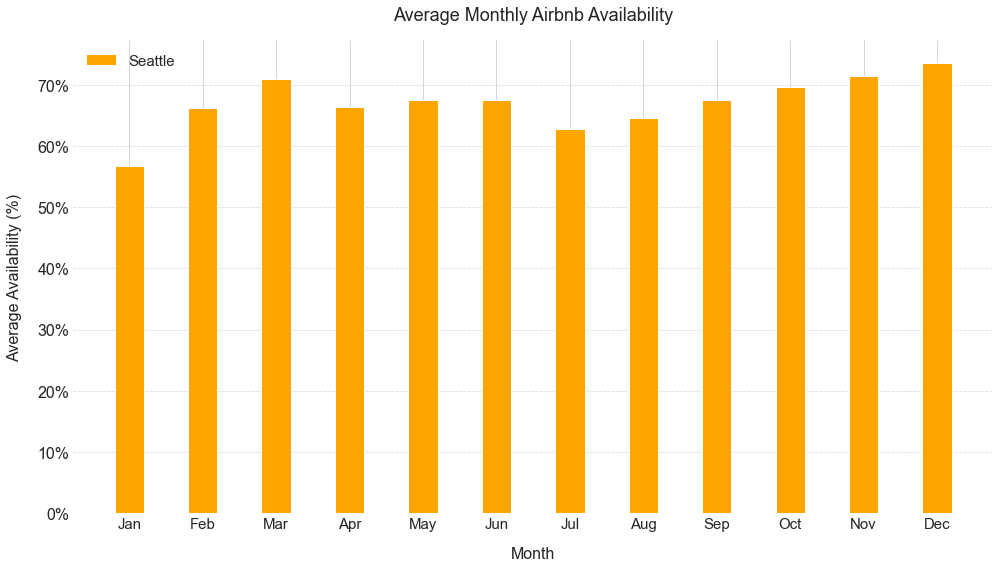

In [170]:
#Seatle Airbnb Calendar Data
#Availability Over Time
data_dict = {'Seattle': seattle_calendar}
colors = {'Seattle': 'orange'}
plot_availability(data_dict, colors)

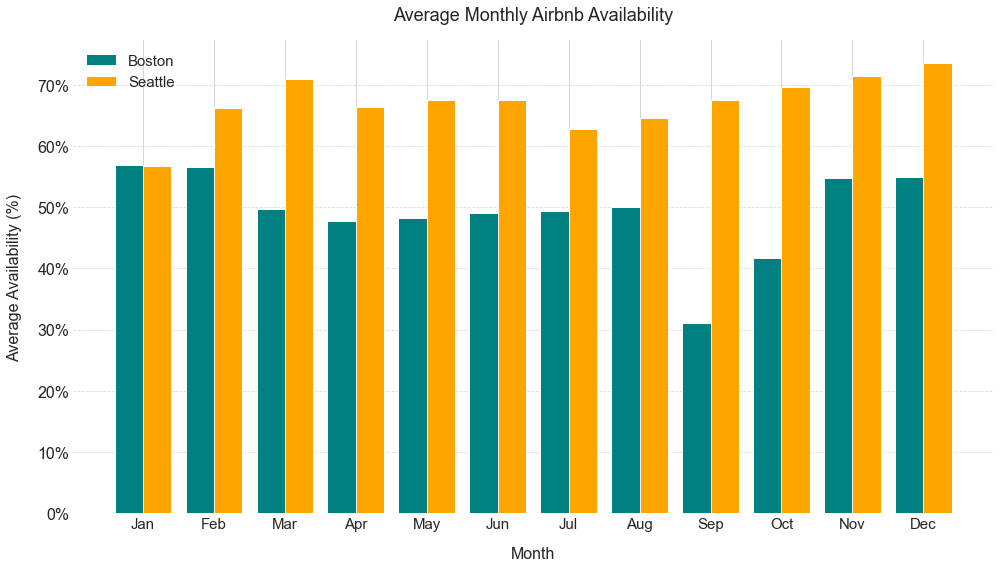

In [171]:
#Combined Availability Over Time Boston vs. Seattle
data_dict = {
    'Boston': boston_calendar,
    'Seattle': seattle_calendar
}
colors = {'Boston': 'teal', 'Seattle': 'orange'}
plot_availability(data_dict, colors, hold=True)

## Average Monthly Price Comparison

In this analysis, we explore how the average Airbnb listing price varies by month in both Boston and Seattle. The line plots enable us to compare the pricing trends and identify periods of higher or lower average prices in each city.

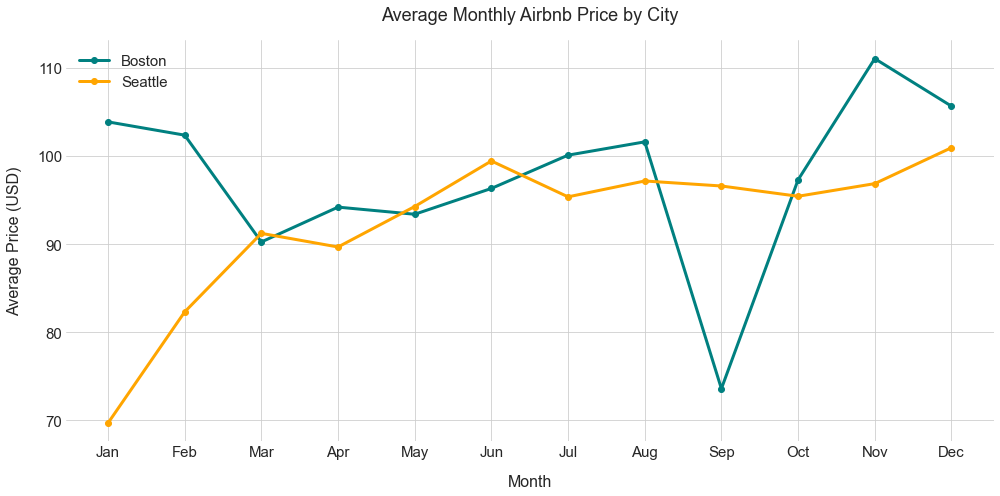

In [172]:
def plot_average_monthly_price(calendar_data_dict, colors):
    """
    Plot the average monthly Airbnb price for each city provided in the calendar_data_dict.

    Parameters:
    - calendar_data_dict (dict): A dictionary with city names as keys and their corresponding calendar DataFrame as values.
    - colors (dict): A dictionary with city names as keys and colors for the plot as values.
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(14, 7))

    for city, calendar_data in calendar_data_dict.items():
        # Calculate the average price by month
        avg_price = calendar_data.groupby('month')['price'].mean()
        # Plot the average price by month
        plt.plot(avg_price.index, avg_price.values, label=city, marker='o', linestyle='-', color=colors[city], linewidth=3)

    # Enhance readability
    plt.title('Average Monthly Airbnb Price by City', fontsize=18, pad=20)
    plt.xlabel('Month', fontsize=16, labelpad=15)
    plt.ylabel('Average Price (USD)', fontsize=16, labelpad=15)
    plt.xticks(ticks=range(1, 13), labels=month_names, fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with a dictionary of the data and colors
calendar_data_dict = {
    'Boston': boston_calendar,
    'Seattle': seattle_calendar
}
colors = {
    'Boston': 'teal',
    'Seattle': 'orange'
}
plot_average_monthly_price(calendar_data_dict, colors)

## Conclusion and Further Reading

In conclusion, this notebook has provided an initial exploration and analysis of Airbnb calendar data for Boston and Seattle. We've focused on key aspects such as price trends and availability patterns, offering valuable insights into the Airbnb market dynamics in these cities.

For a more comprehensive and detailed analysis of our findings, including deeper insights and interpretations, be sure to check out the full analysis in our Medium blog post: ["Airbnb Trends Unveiled: A Closer Look at Seattle and Boston's Calendar Data"](https://medium.com/@yakupakkaya/airbnb-trends-unveiled-a-closer-look-at-seattle-and-bostons-calendar-data-2328db7b979b). This extended analysis covers additional facets of the data, providing a more thorough understanding of the trends and factors influencing Airbnb listings in these popular destinations.